In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [75]:
data=pd.read_csv("Anaemia.csv")

In [76]:
#Data Preprocessing and analysis
data.head()

,NO,Hemoglobin,MCH,MCHC,MCV,GENDER,RESULT
0,1,14.9,22.7,29.1,83.7,Male,Not Anemia
1,2,15.9,25.4,28.3,72.0,Female,Not Anemia
2,3,9.0,21.5,29.6,71.2,Female,Not Anemia
3,4,14.9,16.0,31.4,87.5,Female,Not Anemia
4,5,14.7,22.0,28.2,99.5,Male,Not Anemia


In [77]:
data.isnull().sum()

NO            0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
GENDER        0
RESULT        0
dtype: int64

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   NO          1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   GENDER      1421 non-null   object 
 6   RESULT      1421 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 77.8+ KB


In [79]:
m=data["RESULT"].unique()
print(m)

['Not Anemia' 'Anemia']


In [80]:
data.replace(["Male","Female"],[int(0),int(1)],inplace=True)
data.replace(["Anemia","Not Anemia"],[int(0),int(1)],inplace=True)
color=["#CD5C5C","#FFA07A"]
data["RESULT"].value_counts()

1    801
0    620
Name: RESULT, dtype: int64

Text(0.5, 1.0, 'Anemia Result')

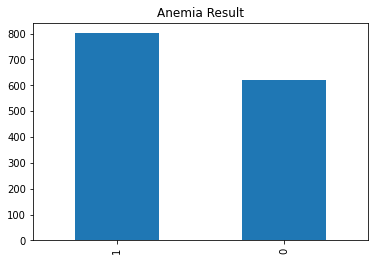

In [81]:
data["RESULT"].value_counts().plot.bar()
plt.title("Anemia Result")

In [82]:
#there is a imbalance in the Result. assumption: there is chance of overfit in the model may occur

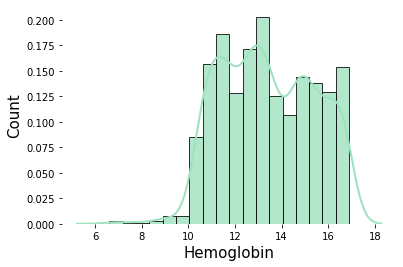

<Figure size 576x432 with 0 Axes>

In [83]:
iqr = np.percentile(data['Hemoglobin'], 75) - np.percentile(data['Hemoglobin'], 25)

# Bin width using the Freedman-Diaconis rule 
bin_width = 2 * iqr / (len(data)**(1/3))
                    
sns.distplot(data['Hemoglobin'], hist=True, kde=True, 
             bins=int(round((data['Hemoglobin'].max() - data['Hemoglobin'].min()) / bin_width)),
             color='#9FE2BF',
             hist_kws={'edgecolor':'black', 'alpha': 0.8},
             kde_kws={'linewidth': 2})
plt.xlabel('Hemoglobin', fontsize=15)
plt.ylabel('Count', fontsize=15)


sns.despine(left=True, bottom=True)

# Adjust plot size
plt.figure(figsize=(8, 6))
# Show plot
plt.show()


In [84]:
# Create a dictionary with the values
hemoglobindata = {'Level': ['low', 'normal', 'high'],
                   'Value': [data['Hemoglobin'].min(), data['Hemoglobin'].mean(), data['Hemoglobin'].max()]}
hemoglobin_tb = pd.DataFrame(hemoglobindata)
hemoglobin_tb
# as we see in above visulaization we can confirm that the normal hemogloblin level ranges from 13.4 to 16.9g per deciliter.
# men<13.4 is low hemoglobin
# women<11.6 is low hemoglobin

,Level,Value
0,low,6.600000
1,normal,13.412738
2,high,16.900000


In [85]:
#MCH is a Mean corpuscular hemoglobin level
MCHdata = {'Level': ['low', 'normal', 'high'],'Value': [data['MCH'].min(), data['MCH'].mean(), data['MCH'].max()]}
MCHtb = pd.DataFrame(MCHdata)
MCHtb

,Level,Value
0,low,16.00000
1,normal,22.90563
2,high,30.00000


In [86]:
#Mean corpusculare hemoglbin concentration
MCHCdata = {'Level': ['Low', 'Normal', 'High'],'Value': [data['MCHC'].min(), data['MCHC'].mean(), data['MCHC'].max()]}
MCHCtable = pd.DataFrame(MCHCdata)
MCHCtable

,Level,Value
0,Low,27.800000
1,Normal,30.251232
2,High,32.500000


In [87]:
MCVdata = {'Level': ['Low', 'Normal', 'High'],'Value': [data['MCV'].min(), data['MCV'].mean(), data['MCV'].max()]}
MCVtb = pd.DataFrame(MCVdata)
MCVtb

,Level,Value
0,Low,69.400000
1,Normal,85.563969
2,High,109.400000


In [88]:
#Statistical testing of Data
from scipy.stats import chi2_contingency 

# Create a contingency table of gender and anemia status
contb = pd.crosstab(data['GENDER'], data['RESULT'])

# Perform the chi-square test of independence
chi2_statistic, p_value, dof, expected = chi2_contingency(contb)

# Print the results
print("Chi-Square Statistic: {:.2f}".format(chi2_statistic))
print("P-Value: {:.3f}".format(p_value))

# Compare the p-value with the significance level (0.05)
if p_value < 0.05:
    print("Null hypothesis: Gender and anemia status are dependent so null hypothesis got rejected.")
else:
    print("Fail to reject null hypothesis: Gender and anemia status are independent.")

Chi-Square Statistic: 90.06
P-Value: 0.000
Null hypothesis: Gender and anemia status are dependent so null hypothesis got rejected.


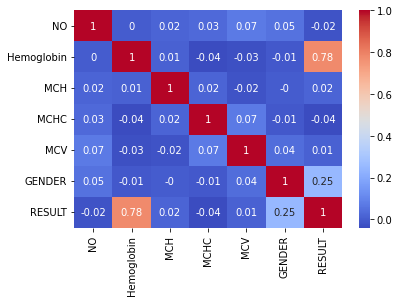

In [89]:
corr_matrix = data.corr().round(2)

# plot the correlation matrix using a heatmap from seaborn
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
#plt.title('Correlation Matrix', fontweight='bold')
plt.show()

In [90]:
#Feature Selection use of cross validation extra tree classifier 
X = data.iloc[:,1:6]  # independent columns
y = data.iloc[:,6] 

In [91]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

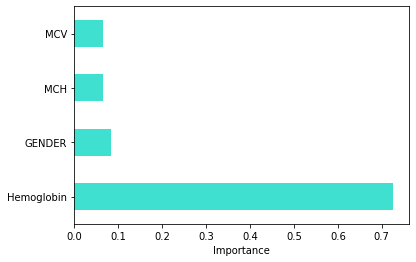

In [92]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)

feat_importances.nlargest(4).plot(kind='barh', color='#40E0D0')
plt.xlabel('Importance')
# plt.title('Top 4 Features Importance', fontweight='bold', fontsize=12)

plt.show()

In [93]:
#splitting of required features for training
X=data[["Hemoglobin","MCV","MCH","GENDER"]]
y=data[["RESULT"]]

In [94]:
X

,Hemoglobin,MCV,MCH,GENDER
0,14.9,83.7,22.7,0
1,15.9,72.0,25.4,1
2,9.0,71.2,21.5,1
3,14.9,87.5,16.0,1
4,14.7,99.5,22.0,0
...,...,...,...,...
1416,10.6,82.9,25.4,1
1417,12.1,86.9,28.3,0
1418,13.1,80.7,17.7,0
1419,14.3,95.2,16.2,1


In [95]:
y

,RESULT
0,1
1,1
2,1
3,1
4,1
...,...
1416,0
1417,0
1418,0
1419,1


In [96]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=25)

In [97]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(max_features='auto', n_estimators=200)
RF.fit(X_train, y_train)
p3=ADA.score(X_test,y_test)*100
result1=RF.predict(X_test)
print(metrics.classification_report(y_test,result1))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       193
           1       1.00      0.99      0.99       234

    accuracy                           0.99       427
   macro avg       0.99      0.99      0.99       427
weighted avg       0.99      0.99      0.99       427



In [98]:
from sklearn.ensemble import AdaBoostClassifier
ADA=AdaBoostClassifier()
ADA.fit(X_train, y_train)
p2=ADA.score(X_test,y_test)*100

result2=ADA.predict(X_test)
print(metrics.classification_report(y_test,result2))
print(p2)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       193
           1       0.99      1.00      0.99       234

    accuracy                           0.99       427
   macro avg       0.99      0.99      0.99       427
weighted avg       0.99      0.99      0.99       427

99.29742388758783


In [99]:
from sklearn.tree import DecisionTreeClassifier
DC=DecisionTreeClassifier()
DC.fit(X_train, y_train)
p4=DC.score(X_test,y_test)*100

result3=DC.predict(X_test)
print(metrics.classification_report(y_test,result3))
print(p4)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       193
           1       0.99      0.98      0.99       234

    accuracy                           0.98       427
   macro avg       0.98      0.98      0.98       427
weighted avg       0.98      0.98      0.98       427

98.36065573770492


In [100]:
from sklearn.naive_bayes import GaussianNB
GB=GaussianNB()
GB.fit(X_train,y_train)
p5=GB.score(X_test,y_test)*100

result4=GB.predict(X_test)
print(metrics.classification_report(y_test,result4))
print(p5)

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       193
           1       0.94      0.90      0.92       234

    accuracy                           0.91       427
   macro avg       0.91      0.91      0.91       427
weighted avg       0.91      0.91      0.91       427

91.10070257611241


In [101]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(random_state=0,max_iter=3000)
LR.fit(X_train, y_train)
p1=LR.score(X_test,y_test)*100

result5=LR.predict(X_test)
print(metrics.classification_report(y_test,result5))
print(p1)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       193
           1       1.00      0.97      0.98       234

    accuracy                           0.98       427
   macro avg       0.98      0.98      0.98       427
weighted avg       0.98      0.98      0.98       427

98.36065573770492


In [102]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel = 'linear',random_state = 0)
svm_classifier.fit(X_train,y_train)

p6=svm_classifier.score(X_test,y_test)*100
print(p6)

98.36065573770492


In [103]:
from sklearn.ensemble import BaggingClassifier

dt_classifier = DecisionTreeClassifier(max_depth = 6, random_state = 1 )

bc_classifier = BaggingClassifier(n_estimators = 300, n_jobs= -1 , random_state=1)

bc_classifier.fit(X_train,y_train)

p7=bc_classifier.score(X_test,y_test)*100
print(p7)

99.06323185011709


In [104]:
from lightgbm import LGBMClassifier

lgbm_classifier = LGBMClassifier(random_state=1)

lgbm_classifier.fit(X_train,y_train)

p8=lgbm_classifier.score(X_test,y_test)*100
print(p8)

[LightGBM] [Info] Number of positive: 567, number of negative: 427
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000897 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 438
[LightGBM] [Info] Number of data points in the train set: 994, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.570423 -> initscore=0.283575
[LightGBM] [Info] Start training from score 0.283575
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

In [105]:
from sklearn.preprocessing import LabelEncoder

# Instantiate the encoder
le = LabelEncoder()

# Fit and transform the target variable
y_train_xg = le.fit_transform(y_train)
y_test_xg = le.fit_transform(y_test)
# Now you can fit the model


In [106]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier()

xgb_classifier.fit(X_train,y_train_xg)

p9=xgb_classifier.score(X_test,y_test_xg)*100
print(p9)

99.29742388758783


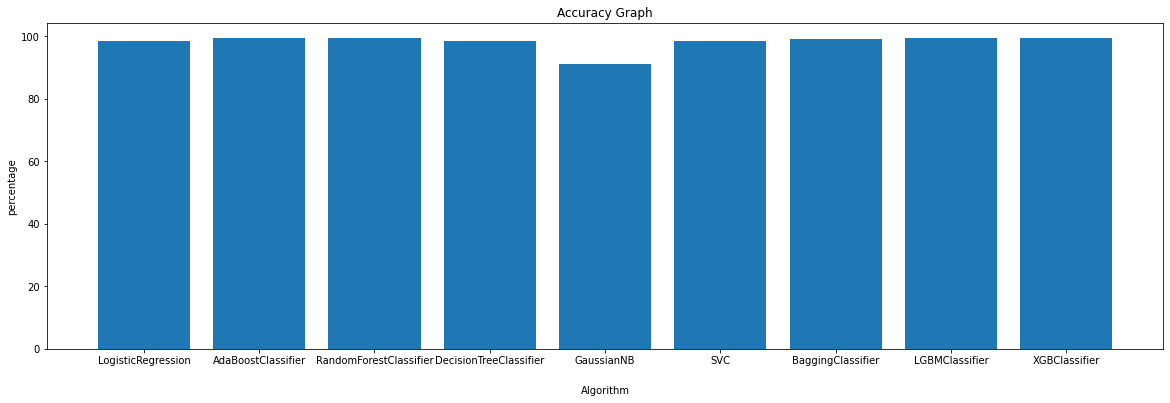

In [107]:
a=["LogisticRegression","AdaBoostClassifier","RandomForestClassifier","DecisionTreeClassifier","GaussianNB","SVC","BaggingClassifier","LGBMClassifier","XGBClassifier"]
b=[p1,p2,p3,p4,p5,p6,p7,p8,p9]
plt.figure(figsize=(20,6))
plt.bar(a,b)
plt.title("Accuracy Graph")
plt.xlabel("Algorithm",labelpad=20)
plt.ylabel("percentage")
plt.show()

In [108]:
#use of ensemble
from sklearn.ensemble import VotingClassifier
model = VotingClassifier(estimators=[('lr', RF), ('dt', ADA)], voting='soft')
model.fit(X_train,y_train)
model.score(X_test,y_test)*100

99.06323185011709

In [109]:
result = model.predict(X_test)
print(metrics.classification_report(y_test, result))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       193
           1       0.99      0.99      0.99       234

    accuracy                           0.99       427
   macro avg       0.99      0.99      0.99       427
weighted avg       0.99      0.99      0.99       427



In [110]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(result , y_test))) 
print('ROC_AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , result)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , result)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , result)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , result)))
# print('Confusion Matrix : \n', cnf_matrix)
print("\n")

Accuracy :0.99063
ROC_AUC : 0.99055
Precision : 0.99145
Recall : 0.99145
F1 : 0.99145




In [111]:
confusionmtr = metrics.confusion_matrix(y_test,result)
confusionmtr

array([[191,   2],
       [  2, 232]], dtype=int64)

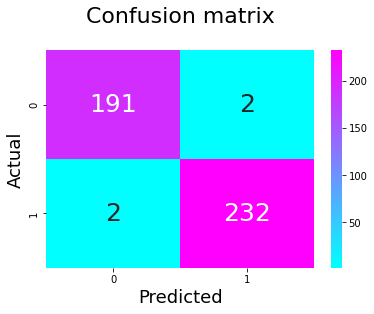

In [112]:
p = sns.heatmap(pd.DataFrame(confusionmtr), annot=True, annot_kws={"size": 25}, cmap="cool" ,fmt='g')
plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.ylabel('Actual',fontsize = 18)
plt.xlabel('Predicted',fontsize = 18)
plt.show()

In [113]:
import pickle
filename = 'model.pkl'
pickle.dump(model, open(filename, 'wb'))
print("Ensemble model:", filename)

Ensemble model: model.pkl
